# Default settings
## Import modules

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import csv
from scipy.stats import shapiro, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

root_dir = Path(os.getcwd())
dataset_loc = root_dir / 'database' / 'dataset.csv'
answer_loc = root_dir / 'database' / 'answer.csv'
result_loc = root_dir / 'database' / 'result.csv'

## Load data

In [ ]:
df1 = pd.read_csv(dataset_loc)
df2 = pd.read_csv(answer_loc)

# Preprocess
## Merge dataset and answer

In [36]:
res = []
for ((i, line1), (j, line2)) in zip(df1.iterrows(), df2.iterrows()):
    res.append(line1.tolist() + line2.tolist())

h = ["Date", "View", "Reply", "Repost", "Like", "Bookmark", "Content", "URL", "Answer", "Reason"]
with open(file=result_loc, mode='w', encoding='utf8', newline='') as w:
    csv_writer = csv.writer(w)
    csv_writer.writerow(h)
    csv_writer.writerows(res)


# Methodology
## Load data

In [37]:
df = pd.read_csv(result_loc)

## Binary classification (false group vs positive group)

In [47]:
data = {}

data['False'] = df[(df['Answer'].str.contains('false', case=False, na=False)) | (df['Answer'].str.contains('pants-fire', case=False, na=False))]
data['True'] = df[df['Answer'].str.contains('true', case=False, na=False)]
data['Uncertain'] = df[df['Answer'].str.contains('uncertain', case=False, na=False)]

data['False'].shape, data['True'].shape, data['Uncertain'].shape

((34, 10), (21, 10), (4, 10))

## Statistics

In [48]:
data['False'].describe()

,View,Reply,Repost,Like,Bookmark
count,3.400000e+01,34.000000,34.000000,34.000000,34.000000
mean,2.911471e+07,20352.941176,57588.235294,296297.058824,7570.588235
std,1.536072e+07,16510.056353,24813.385497,143239.343007,13620.005994
min,9.400000e+06,6800.000000,27000.000000,30100.000000,1200.000000
25%,1.985000e+07,11000.000000,42250.000000,216000.000000,3025.000000
50%,2.945000e+07,15000.000000,51500.000000,274500.000000,4300.000000
75%,3.310000e+07,25750.000000,67500.000000,334500.000000,7075.000000
max,8.560000e+07,91000.000000,141000.000000,794000.000000,82000.000000


In [49]:
data['True'].describe()

,View,Reply,Repost,Like,Bookmark
count,2.100000e+01,21.000000,21.000000,21.000000,21.000000
mean,3.177143e+07,13161.904762,40352.380952,251666.666667,6141.333333
std,2.624302e+07,10076.133990,30214.510075,195995.493145,9550.396601
min,6.000000e+06,1400.000000,7900.000000,39000.000000,267.000000
25%,1.440000e+07,7100.000000,19000.000000,105000.000000,1500.000000
50%,2.600000e+07,10000.000000,29000.000000,208000.000000,3100.000000
75%,3.180000e+07,18000.000000,58000.000000,335000.000000,8000.000000
max,1.072000e+08,36000.000000,111000.000000,697000.000000,45000.000000


## Normality test (n < 51, Shapiro-Wilk test)

In [69]:
for c in ["View","Reply","Repost","Like","Bookmark"]:
    stat, p_value = shapiro(data['False'][c])
    print(f'{c} - {p_value}')

    if p_value > 0.05:
        print("데이터는 정규성을 따릅니다. (귀무가설 채택)")
    else:
        print("데이터는 정규성을 따르지 않습니다. (귀무가설 기각)")


View - 0.00032032809016997705
데이터는 정규성을 따르지 않습니다. (귀무가설 기각)
Reply - 2.8233681527121864e-07
데이터는 정규성을 따르지 않습니다. (귀무가설 기각)
Repost - 0.0008804328434958094
데이터는 정규성을 따르지 않습니다. (귀무가설 기각)
Like - 0.00011904483363406477
데이터는 정규성을 따르지 않습니다. (귀무가설 기각)
Bookmark - 5.438596100709144e-11
데이터는 정규성을 따르지 않습니다. (귀무가설 기각)


In [70]:
for c in ["View","Reply","Repost","Like","Bookmark"]:
    stat, p_value = shapiro(data['True'][c])
    print(f'{c} - {p_value}')

    if p_value > 0.05:
        print("데이터는 정규성을 따릅니다. (귀무가설 채택)")
    else:
        print("데이터는 정규성을 따르지 않습니다. (귀무가설 기각)")


View - 0.0008030341407706182
데이터는 정규성을 따르지 않습니다. (귀무가설 기각)
Reply - 0.019754488570987726
데이터는 정규성을 따르지 않습니다. (귀무가설 기각)
Repost - 0.013744715239349484
데이터는 정규성을 따르지 않습니다. (귀무가설 기각)
Like - 0.017421813836049294
데이터는 정규성을 따르지 않습니다. (귀무가설 기각)
Bookmark - 6.029583705806585e-07
데이터는 정규성을 따르지 않습니다. (귀무가설 기각)


## Mann-Whitney U Test (dataset is independent)

In [73]:
for c in ["View","Reply","Repost","Like","Bookmark"]:
    stat, p_value = mannwhitneyu(data['True'][c], data['False'][c], alternative='two-sided')
    print(f'{c} - {p_value}')
    
    if p_value > 0.05:
        print("두 집단 간의 차이는 유의하지 않습니다. (귀무가설 채택)")
    else:
        print("두 집단 간의 차이는 유의합니다. (귀무가설 기각)")

View - 0.5852280177376499
두 집단 간의 차이는 유의하지 않습니다. (귀무가설 채택)
Reply - 0.030131786343137814
두 집단 간의 차이는 유의합니다. (귀무가설 기각)
Repost - 0.006346632215598066
두 집단 간의 차이는 유의합니다. (귀무가설 기각)
Like - 0.07577061717687292
두 집단 간의 차이는 유의하지 않습니다. (귀무가설 채택)
Bookmark - 0.21845529165385102
두 집단 간의 차이는 유의하지 않습니다. (귀무가설 채택)


## Plot

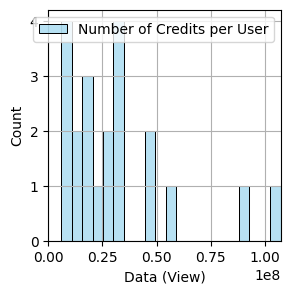

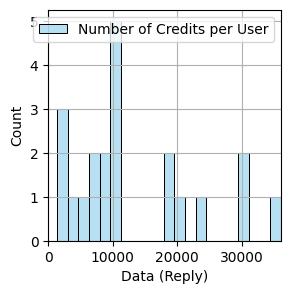

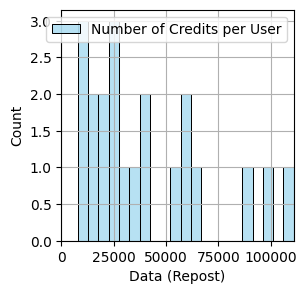

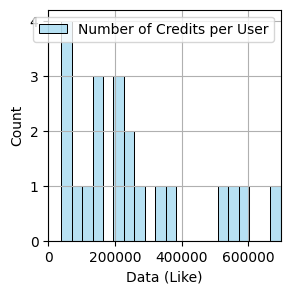

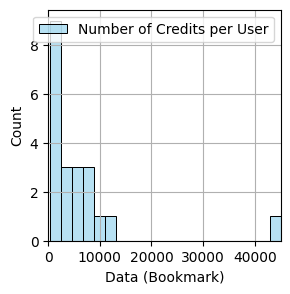

In [141]:
for c in ["View","Reply","Repost","Like","Bookmark"]:
    plt.figure(figsize=(3, 3))
    sns.histplot(data['True'][c], bins=21, kde=False, color='skyblue', alpha=0.6, label='Number of Credits per User')
    plt.xlabel(f'Data ({c})')
    plt.ylabel('Count')
    plt.xlim([0, max(data['True'][c])])
    plt.legend()
    plt.grid(True)
    plt.show()


## 날짜에 따라서 얼마나 misinformation이 늘어나는지 확인하기

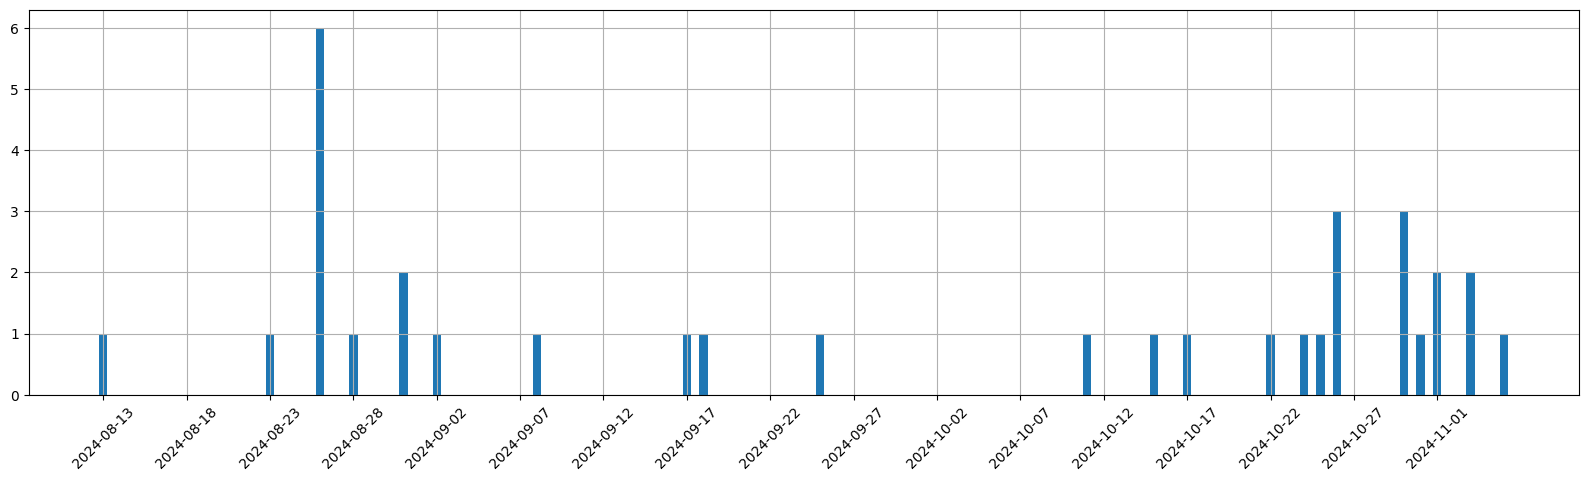

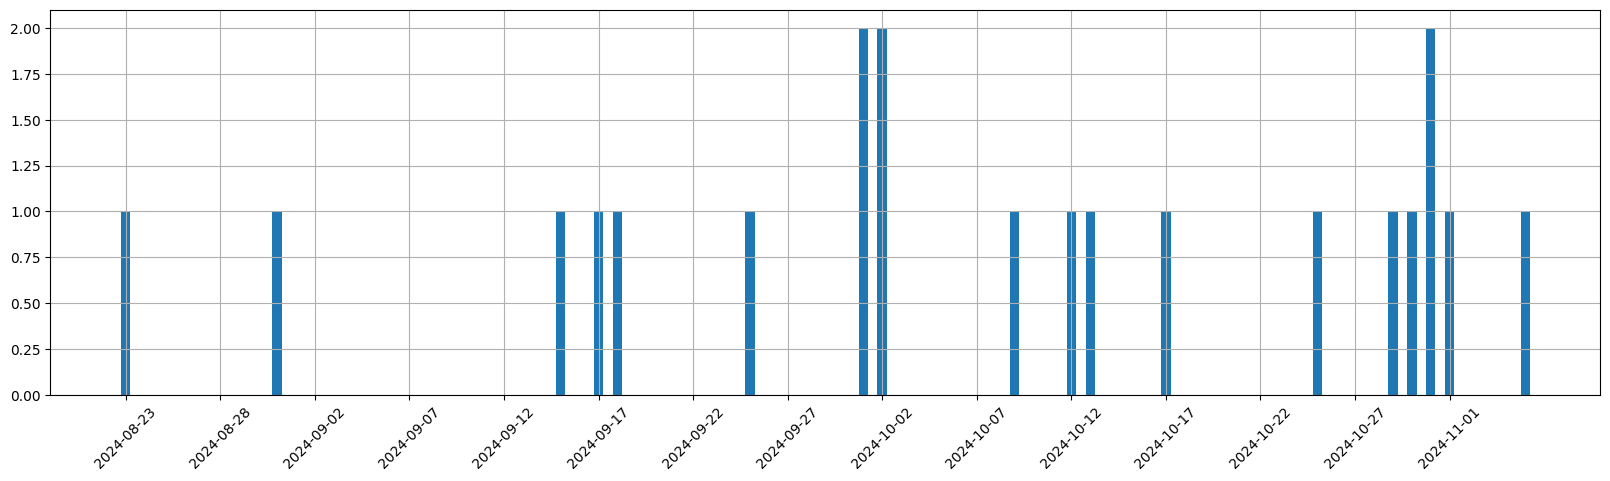

In [140]:
for v in ['False', 'True']:
    for c in ["View", "Reply", "Repost", "Like", "Bookmark"][:1]:
        tmp = data[v]
        data_tmp = defaultdict(int)
        for (i, line) in tmp.iterrows():
            data_tmp[line['Date'].replace('.', '-')] += 1

        date_range = pd.date_range(start=sorted(data_tmp.keys())[0], end=sorted(data_tmp.keys())[-1])
        date_range = [i.strftime('%Y-%m-%d') for i in date_range]
        
        data_new = {}
        for date in date_range:
            data_new[date] = data_tmp[date] if data_tmp[date] != 0 else 0

        # print(f'{c} - {data_new}')
        
        plt.figure(figsize=(20, 5))
        plt.bar(date_range, [j for (i, j) in data_new.items()], width=0.5, label="모름")
        
        plt.xticks(ticks=range(0, len(date_range), max(1, len(date_range)//15)),
                labels=[date_range[i] for i in range(0, len(date_range), max(1, len(date_range)//15))],
                rotation=45, fontsize=10)
        plt.grid(True)
        plt.show()


## 전체 데이터(59개 = Uncertain + True + False)에 대하여 View 순으로 하위 10%, 상위 10% posts 분석.

In [153]:
df_sorted_view = df.sort_values(by='View', ascending=True)
df_bottom = df_sorted_view[:6]['Content'].tolist()
df_top = df_sorted_view[-6:]['Content'].tolist()

In [160]:
len_bottom = [len(i) for i in df_bottom]
len_top = [len(i) for i in df_top]
len_total = [len(i) for i in df['Content']]
def stats(n: list[float]) -> tuple:
    return np.mean(n), np.median(n), np.std(n), np.max(n), np.min(n)
print(stats(len_bottom))
print(stats(len_top))
print(stats(len_total))

(462.3333333333333, 445.0, 245.20173100712177, 784, 149)
(346.6666666666667, 378.0, 216.84684815683985, 589, 70)
(500.03389830508473, 394.0, 295.4258039348729, 1295, 36)


## Misinformation 데이터(34개 = False)에 대하여 View 순으로 하위 6개, 상위 6개 posts 분석.

In [165]:
df_sorted_view = data['False'].sort_values(by='View', ascending=True)
df_bottom = df_sorted_view[:6]['Content'].tolist()
df_top = df_sorted_view[-6:]['Content'].tolist()

len_bottom = [len(i) for i in df_bottom]
len_top = [len(i) for i in df_top]
len_total = [len(i) for i in df['Content']]
def stats(n: list[float]) -> tuple:
    return np.mean(n), np.median(n), np.std(n), np.max(n), np.min(n)
print(stats(len_bottom))
print(stats(len_top))

(267.0, 263.0, 92.58869621431477, 394, 149)
(413.1666666666667, 419.0, 230.01696797313792, 737, 83)


## Non-misinformation 데이터(21개 = True)에 대하여 View 순으로 하위 6개, 상위 6개 posts 분석.

In [164]:
df_sorted_view = data['True'].sort_values(by='View', ascending=True)
df_bottom = df_sorted_view[:6]['Content'].tolist()
df_top = df_sorted_view[-6:]['Content'].tolist()

len_bottom = [len(i) for i in df_bottom]
len_top = [len(i) for i in df_top]
len_total = [len(i) for i in df['Content']]
def stats(n: list[float]) -> tuple:
    return np.mean(n), np.median(n), np.std(n), np.max(n), np.min(n)
print(stats(len_bottom))
print(stats(len_top))

(556.3333333333334, 613.0, 182.4752646859903, 784, 277)
(485.0, 500.0, 222.6679141681621, 820, 70)
